In [58]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
df = pd.read_csv("/content/data.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [60]:
label_encoder = LabelEncoder()
df['diagnosis'] = label_encoder.fit_transform(df['diagnosis'])
X = df.drop(columns=['id', 'diagnosis', 'Unnamed: 32'])
y = df['diagnosis'].astype(np.int32)


X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


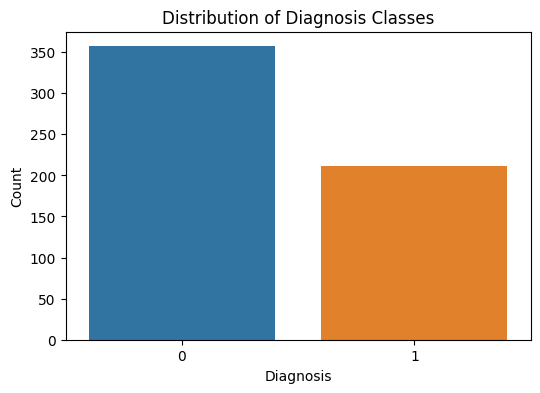

In [61]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='diagnosis')
plt.title('Distribution of Diagnosis Classes')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.show()

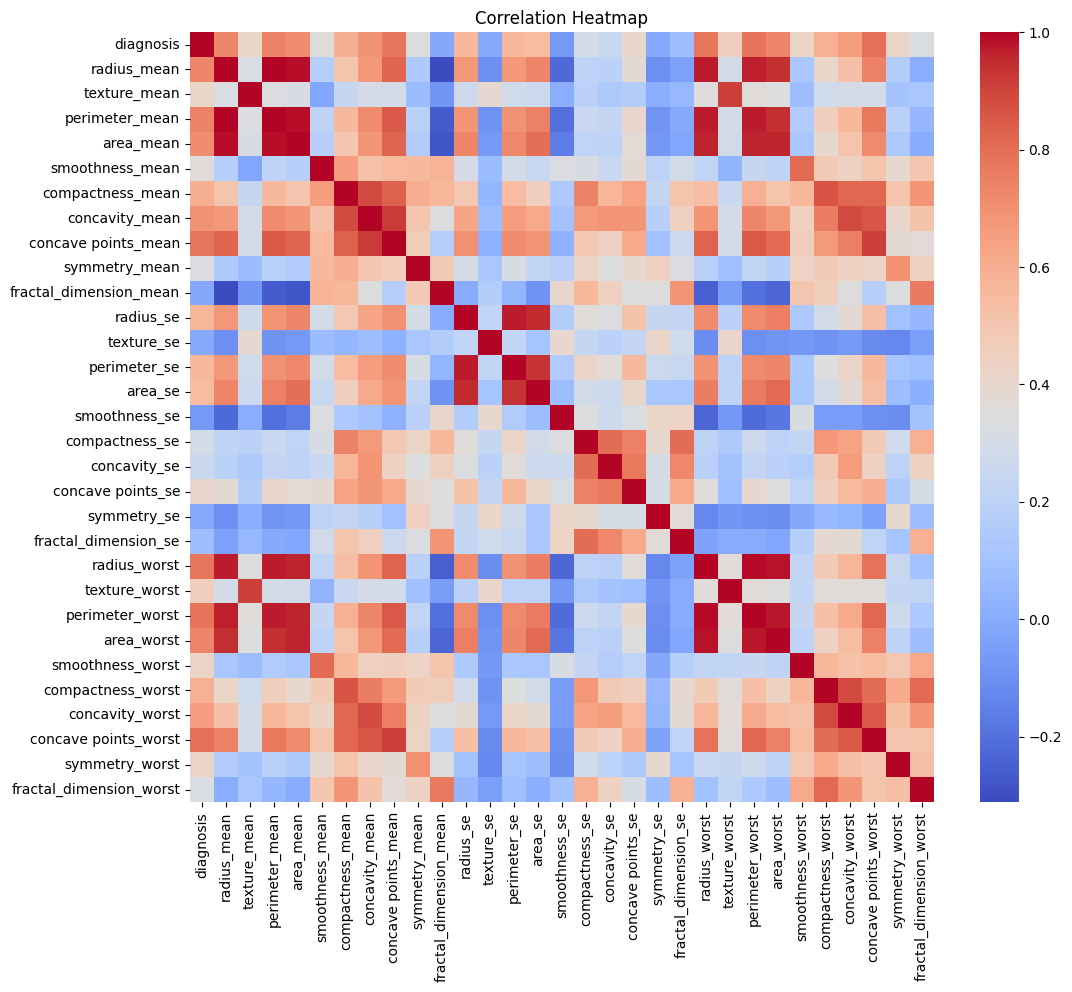

In [62]:
correlation_matrix = df.drop(columns=['id', 'Unnamed: 32']).corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

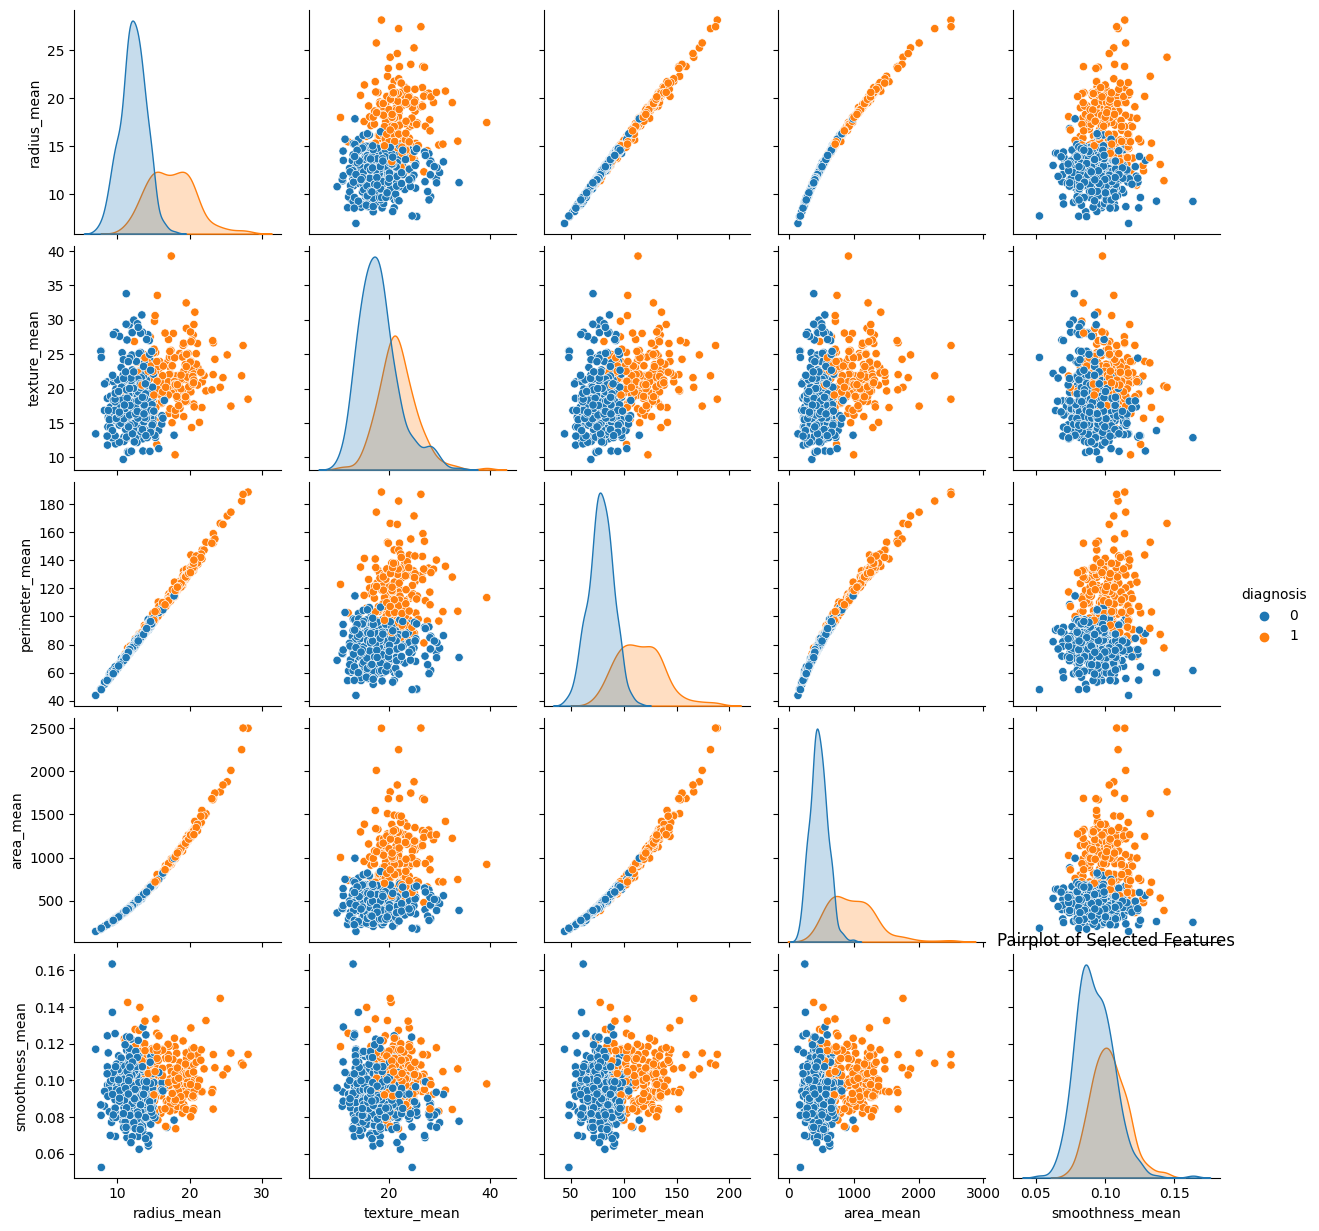

In [63]:
features_subset = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean']
sns.pairplot(data=df, hue='diagnosis', vars=features_subset)
plt.title('Pairplot of Selected Features')
plt.show()

In [64]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score
def build_model(input_size) :
  model = Sequential()
  model.add(Dense(input_size,activation = "relu"))
  model.add(Dense(32,activation = "relu"))
  model.add(Dense(64,activation = "relu"))
  model.add(Dense(128,activation = "relu"))
  model.add(Dense(2,activation = "softmax"))

  model.compile(optimizer ="adam",loss ="sparse_categorical_crossentropy",metrics = ["accuracy"])
  model.fit(X_train_scaled, y_train, epochs=20, batch_size=32, validation_split=0.1, verbose=1)

  return model

In [65]:
model = build_model(X_train.shape[1])
model.summary()

Epoch 1/20
13/13 [==============================] - 2s 19ms/step - loss: 0.5665 - accuracy: 0.8386 - val_loss: 0.4476 - val_accuracy: 0.9130
Epoch 2/20
13/13 [==============================] - 0s 5ms/step - loss: 0.2989 - accuracy: 0.9560 - val_loss: 0.2210 - val_accuracy: 0.9565
Epoch 3/20
13/13 [==============================] - 0s 7ms/step - loss: 0.1301 - accuracy: 0.9633 - val_loss: 0.1399 - val_accuracy: 0.9565
Epoch 4/20
13/13 [==============================] - 0s 6ms/step - loss: 0.0785 - accuracy: 0.9731 - val_loss: 0.1128 - val_accuracy: 0.9565
Epoch 5/20
13/13 [==============================] - 0s 8ms/step - loss: 0.0556 - accuracy: 0.9878 - val_loss: 0.1098 - val_accuracy: 0.9565
Epoch 6/20
13/13 [==============================] - 0s 6ms/step - loss: 0.0452 - accuracy: 0.9927 - val_loss: 0.0964 - val_accuracy: 0.9565
Epoch 7/20
13/13 [==============================] - 0s 6ms/step - loss: 0.0387 - accuracy: 0.9902 - val_loss: 0.0893 - val_accuracy: 0.9565
Epoch 8/20
13/13 [=

In [66]:

  y_pred = np.argmax(model.predict(X_test_scaled), axis=-1)
  test_accuracy = accuracy_score(y_test, y_pred)
  print("Test Accuracy:", test_accuracy)

4/4 [==============================] - 0s 3ms/step
Test Accuracy: 0.9385964912280702


In [67]:
from sklearn.metrics import confusion_matrix, classification_report

# Calculate the confusion matrix
confusion = confusion_matrix(y_test, y_pred)

# Calculate classification report which includes precision, recall, F1-score, and support
class_report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)

print("Confusion Matrix:")
print(confusion)
print("\nClassification Report:")
print(class_report)


Confusion Matrix:
[[70  3]
 [ 4 37]]

Classification Report:
              precision    recall  f1-score   support

           B       0.95      0.96      0.95        73
           M       0.93      0.90      0.91        41

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114

